The code below performs the following functions now that the data is cleaned

1. FREQUENCY ANALYSIS:
   - Reloads the cleaned datasets.
   - Converts token strings back into Python lists.
   - Extracts all tokens for each section.
   - Computes word‑frequency counts using Counter.
   - Prints the top 10 most frequent words for News and Opinion.

2. EDA VISUALIZATION:
   - Creates bar charts showing the top 10 most frequent words in each section.
   - Helps visualize differences in vocabulary emphasis between News and Opinion titles.

3. STATISTICAL COMPARISON:
   - Identifies the 25 most common words across both sections.
   - Builds a contingency table of News vs. Opinion word counts.
   - Performs a chi‑square test of independence to evaluate whether
     News and Opinion sections differ significantly in their word‑frequency distributions.
   - Prints the chi‑square statistic, degrees of freedom, and p‑value.

In [2]:
# Extract top 10 words for opinions and news
import pandas as pd
from collections import Counter
from itertools import chain
import ast  # safely converts string -> list

news = pd.read_csv(r"../DATA/News_cleaned.csv")
opinion = pd.read_csv(r"../DATA/Opinion_cleaned.csv")

news['tokens'] = news['tokens'].apply(ast.literal_eval)
opinion['tokens'] = opinion['tokens'].apply(ast.literal_eval)

df = pd.concat([news, opinion], ignore_index=True)

news_words = list(chain.from_iterable(df[df['section'] == 'News']['tokens']))
opinion_words = list(chain.from_iterable(df[df['section'] == 'Opinion']['tokens']))

news_freq = Counter(news_words)
opinion_freq = Counter(opinion_words)

print("Top 10 News words:")
print(news_freq.most_common(10))

print("\nTop 10 Opinion words:")
print(opinion_freq.most_common(10))


FileNotFoundError: [Errno 2] No such file or directory: '../DATA/News_cleaned.csv'

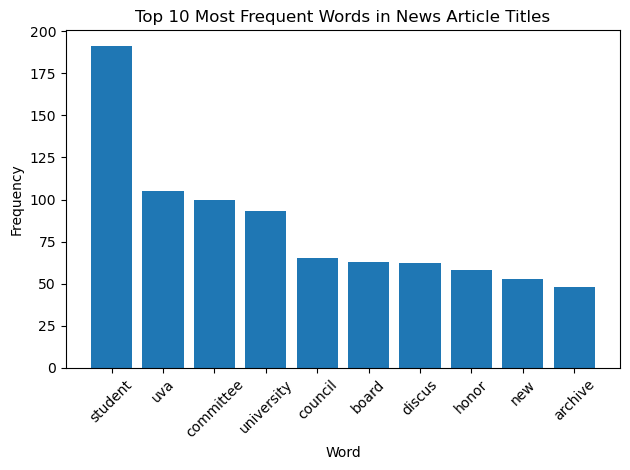

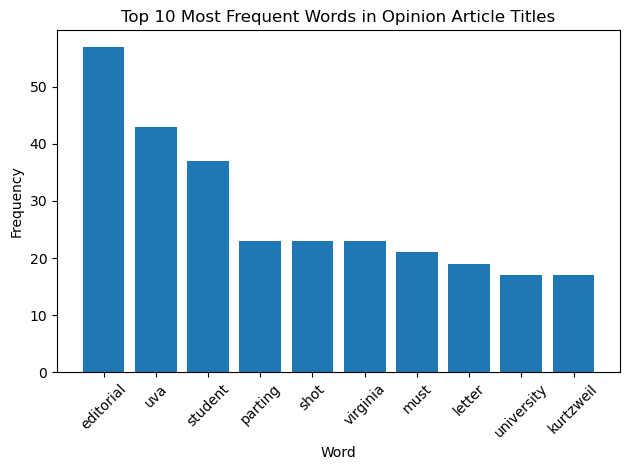

In [ ]:
# Generate EDA Plots

import matplotlib.pyplot as plt

# Plot 1: News
words, counts = zip(*news_freq.most_common(10))
plt.figure()
plt.bar(words, counts)
plt.title("Top 10 Most Frequent Words in News Article Titles")
plt.xticks(rotation=45)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.tight_layout()

# Save to OUTPUT folder
plt.savefig("../OUTPUT/news_top10.png")

plt.show()

# Plot 2: Opinion
words, counts = zip(*opinion_freq.most_common(10))
plt.figure()
plt.bar(words, counts)
plt.title("Top 10 Most Frequent Words in Opinion Article Titles")
plt.xticks(rotation=45)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.tight_layout()

# Save to OUTPUT folder
plt.savefig("../OUTPUT/opinion_top10.png")

plt.show()


In [1]:
df['title_length'] = df['tokens'].apply(len)

news_lengths = df[df['section'] == 'News']['title_length']
opinion_lengths = df[df['section'] == 'Opinion']['title_length']

import matplotlib.pyplot as plt

plt.figure()
plt.boxplot(
    [news_lengths, opinion_lengths],
    labels=['News', 'Opinion']
)
plt.title("Distribution of Title Lengths by Section")
plt.ylabel("Number of Words per Title")
plt.tight_layout()
plt.show()



NameError: name 'df' is not defined

In [ ]:
# Perform Analysis on Word Usage Differences
import pandas as pd
import ast
from collections import Counter
from itertools import chain
from scipy.stats import chi2_contingency

news = pd.read_csv(r"../DATA/News_cleaned.csv")
opinion = pd.read_csv(r"../DATA/Opinion_cleaned.csv")

news['tokens'] = news['tokens'].apply(ast.literal_eval)
opinion['tokens'] = opinion['tokens'].apply(ast.literal_eval)

news_words = list(chain.from_iterable(news['tokens']))
opinion_words = list(chain.from_iterable(opinion['tokens']))

news_freq = Counter(news_words)
opinion_freq = Counter(opinion_words)

combined_freq = news_freq + opinion_freq
top_words = [word for word, _ in combined_freq.most_common(25)]

table = []
for word in top_words:
    table.append([
        news_freq.get(word, 0),
        opinion_freq.get(word, 0)
    ])

contingency_df = pd.DataFrame(
    table,
    index=top_words,
    columns=["News", "Opinion"]
)

# Save the table to OUTPUT folder
contingency_df.to_csv("../OUTPUT/word_frequency_table.csv")
print("Saved table to ../OUTPUT/word_frequency_table.csv")

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_df)

print(f"Chi-square statistic: {chi2:.2f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p:.6f}")


Saved table to ../OUTPUT/word_frequency_table.csv
Chi-square statistic: 438.90
Degrees of freedom: 24
P-value: 0.000000
